In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

# DataFrames, Slicing, Filtering


This section introduces the main `pandas` data structures for working with data
tables.

There's a 2021 New York Times article that talks about Prince Harry and
Meghan's unique choice for their new baby daughter's name: Lilibet
{cite}`williamsLilith2021`. The article has an interview with Pamela Redmond,
an expert on baby names, who talks about interesting trends in how people name
their kids. For example, she says that names that start with the letter "L"
have become very popular in recent years, while names that start with the
letter "J" were popular in the 1970s and 1980s. Are these claims reflected in
data? We can use `pandas` to find out!

First, import the package as `pd`, the canonical abbreviation:

In [2]:
import pandas as pd

We have a dataset of baby names stored in a comma-separated values (CSV) file
called `babynames.csv`. Use the `pd.read_csv` function to read the file as a
`pandas.DataFrame` object.

In [3]:
baby = pd.read_csv('babynames.csv')
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


## DataFrames and Indices

Let's pause here and explain what you're looking at. A dataframe has rows and
columns. Every row and column has a label:

```{image} figures/baby_labels.svg
:alt: baby_labels
```

By default, `pandas` assigns row labels as incrementing numbers starting from
0. In this case, the data at the row labeled `0` and column labeled `Name` has
the data `'Mary'`.

Dataframes can also have strings as row labels. Here's an example of a
dataframe with US state mottos. Every row is labeled with the state.

```{image} figures/motto_labels.svg
:alt: motto_labels
```

The row labels have a special name. We call them the **index** of a dataframe,
and `pandas` stores the row labels in a special `pandas.Index` object. We won't
discuss the `pandas.Index` object since you don't often have to manipulate the
index itself. But you should remember that even though the index looks like a
column of data, the index really represents row labels, not data. For instance,
the dataframe of US state mottos has 4 columns of data, not 5, since the index
doesn't count as a column.

## About the Data

The data in the `baby` table comes from the US Social Security department,
which records the baby name and birth sex for birth certificate purposes. They
make the baby names data available on their website [^babynamesData], and we've
loaded this data into the `baby` table.

[^babynamesData]: “Social Secuity Baby Names.” Accessed August 16, 2021. https://www.ssa.gov/oact/babynames/index.html.

When you start working with a dataset you should collect information about how
the data were collected. In this case, the Social Security website also has a
page that describes the data in more detail
([link](https://www.ssa.gov/oact/babynames/background.html)). We won't go
in-depth in this chapter about the data's limitations, but you should remember
this quote from the website:

> All names are from Social Security card applications for births that occurred
> in the United States after 1879. Note that many people born before 1937 never
> applied for a Social Security card, so their names are not included in our
> data. For others who did apply, our records may not show the place of birth,
> and again their names are not included in our data.
>
> All data are from a 100% sample of our records on Social Security card
> applications as of March 2021.

## Slicing

*Slicing* refers to taking rows or columns out of a dataframe. Think about
slicing a tomato---you can go both vertially and horizontally. To take slices
of a dataframe in `pandas`, we use the `.loc` and `.iloc` properties. Let's
start with `.loc`.

Here's the full `baby` dataframe:

In [4]:
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


`.loc` lets you select rows and columns using their labels. For example, to get the data in the row labeled `1` and column labeled `Name`:

In [5]:
#        The first argument is the row label
#        ↓
baby.loc[1, 'Name']
#            ↑
#            The second argument is the column label

'Noah'

:::{warning}
Notice that `.loc` needs brackets; running `baby.loc(1, 'Name')` will error.
:::

To slice out multiple rows or column, use Python slice syntax instead of
individual values:

In [6]:
baby.loc[0:3, 'Name':'Count']

,Name,Sex,Count
0,Liam,M,19659
1,Noah,M,18252
2,Oliver,M,14147
3,Elijah,M,13034


To get an entire column of data, pass an empty slice as the first argument:

In [7]:
baby.loc[:, 'Count']

0          19659
1          18252
2          14147
           ...  
2020719        5
2020720        5
2020721        5
Name: Count, Length: 2020722, dtype: int64

Notice that the output of this doesn't look like a dataframe, and it's not.
Selecting out a single row or column of a dataframe produces a `pd.Series`
object.

In [8]:
counts = baby.loc[:, 'Count']
counts.__class__.__name__

'Series'

What's the difference between a `pd.Series` and `pd.DataFrame` object?
Essentially, a `pd.DataFrame` is two-dimensional---it has rows and columns and
represents a table of data. A `pd.Series` is one-dimensional---it represents a
list of data. `pd.Series` and `pd.DataFrame` objects have many methods in
common, but you'll need to remember that they represent two different things.

You'll also often need to select out specific columns out of a dataframe. To do
this, pass a list into `.loc`:

In [9]:
# Here's the original dataframe
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


In [10]:
# And here's the dataframe with only Name and Year columns
baby.loc[:, ['Name', 'Year']]
#           └-------┬------┘
#                   |
#         list of column labels

,Name,Year
0,Liam,2020
1,Noah,2020
2,Oliver,2020
...,...,...
2020719,Verona,1880
2020720,Vertie,1880
2020721,Wilma,1880


Selecting columns is very common, so there's a shorthand.

In [11]:
# Shorthand for baby.loc[:, 'Name']
baby['Name']

0            Liam
1            Noah
2          Oliver
            ...  
2020719    Verona
2020720    Vertie
2020721     Wilma
Name: Name, Length: 2020722, dtype: object

In [12]:
# Shorthand for baby.loc[:, ['Name', 'Count']]
baby[['Name', 'Count']]

,Name,Count
0,Liam,19659
1,Noah,18252
2,Oliver,14147
...,...,...
2020719,Verona,5
2020720,Vertie,5
2020721,Wilma,5


Slicing using `.iloc` works similarly to `.loc`, except that `.iloc` uses the
*positions* of rows and columns rather than labels. It's easiest to show the
difference between `.iloc` and `.loc` when the dataframe index has strings, so
for demonstration purposes let's look at a dataframe with state mottos:

In [13]:
mottos = pd.read_csv('mottos.csv', index_col='State')
mottos

,Motto,Translation,Language,Date Adopted
State,,,,
Alabama,Audemus jura nostra defendere,We dare defend our rights!,Latin,1923
Alaska,North to the future,—,English,1967
Arizona,Ditat Deus,God enriches,Latin,1863
...,...,...,...,...
West Virginia,Montani semper liberi,Mountaineers are always free,Latin,"September 26, 1863"
Wisconsin,Forward,—,English,1851
Wyoming,Equal Rights,—,English,1893


To get the first three rows and first two columns by position, use `.iloc`:

In [14]:
mottos.iloc[0:3, 0:2]

,Motto,Translation
State,,
Alabama,Audemus jura nostra defendere,We dare defend our rights!
Alaska,North to the future,—
Arizona,Ditat Deus,God enriches


The operation using `.loc` requires you to use the dataframe labels:

In [15]:
# Get rows from Alabama to Arizona, and columns from Motto to Translation
mottos.loc['Alabama':'Arizona', 'Motto':'Translation']

,Motto,Translation
State,,
Alabama,Audemus jura nostra defendere,We dare defend our rights!
Alaska,North to the future,—
Arizona,Ditat Deus,God enriches


## Filtering Rows

So far, you've seen how to use `.loc` and `.iloc` to slice a dataframe using
its labels. But what about when you want to take slices of a dataframe based on
its data? For example, if you want to look at the most popular baby names in
2020, then you need to *filter* rows and keep only rows where the `Year` is
2020.

To do this, you need to write a program to 1) check each value in the `Year`
column to see if it's equal to 1970, then 2) keep only those rows.

To compare each value in `Year`, slice out the column and make a boolean
comparison. (This is similar to what you would do with a `numpy` array.)

In [16]:
# Here's the dataframe for reference
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


In [17]:
# Get a Series with the Year data
baby['Year']

0          2020
1          2020
2          2020
           ... 
2020719    1880
2020720    1880
2020721    1880
Name: Year, Length: 2020722, dtype: int64

In [18]:
# Compare with 2020
baby['Year'] == 2020

0           True
1           True
2           True
           ...  
2020719    False
2020720    False
2020721    False
Name: Year, Length: 2020722, dtype: bool

Notice that a boolean comparison on a Series gives a Series of booleans. This
is nearly equivalent to writing:

```python
is_2020 = []
for value in baby['Year']:
    is_2020.append(value == 2020)
```

But the boolean comparison is easier to write and much faster to execute than a
`for` loop.

Now, we tell `pandas` to keep only the rows where the comparison evaluated to `True`:

In [19]:
# Passing a Series of booleans into .loc only keeps rows where the Series has
# a True value.
#        ↓
baby.loc[baby['Year'] == 2020, :]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
31267,Zylynn,F,5,2020
31268,Zynique,F,5,2020
31269,Zynlee,F,5,2020


In [20]:
# Filtering has a shorthand. This computes the same table as the snippet above
# without using .loc
baby[baby['Year'] == 2020]

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
31267,Zylynn,F,5,2020
31268,Zynique,F,5,2020
31269,Zynlee,F,5,2020


Finally, to find the most common names in 2020, sort the dataframe by `Count`
in descending order.

In [21]:
# When you have a long expression, you can wrap it in parentheses, then add
# line breaks to make it more readable.
(baby[baby['Year'] == 2020]
 .sort_values('Count', ascending=False)
 .head(7) # take the first seven rows
)

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
13911,Emma,F,15581,2020
2,Oliver,M,14147,2020
13912,Ava,F,13084,2020
3,Elijah,M,13034,2020
13913,Charlotte,F,13003,2020


## Example: How recently has Luna become a popular name?

The New York Times article mentions that the name "Luna" was almost nonexistent
before 2000 but has since grown to become a very popular name for girls. We can
check this using slicing and filtering. When you approach a data manipulation
task, start by breaking the problem down into steps. For example, you could
think:

1. Filter: keep only rows with `'Luna'` in the `Name` column.
1. Filter: keep only rows with `'F'` in the `Sex` column.
1. Select: keep the `Count` and `Year` columns.

Now, it's a matter of translating each step into code.

In [22]:
luna = baby[baby['Name'] == 'Luna']
luna = luna[luna['Sex'] == 'F']
luna = luna[['Count', 'Year']]
luna

,Count,Year
13923,7770,2020
45366,7772,2019
77393,6929,2018
...,...,...
2014083,17,1883
2018187,18,1881
2020223,15,1880


`pandas` has some plotting functionality. We won't go in-depth in plotting here
since we talk more about plotting in the Visualization chapter. But for now,
remember that you can use `.plot()` on a dataframe to make a few simple plots.

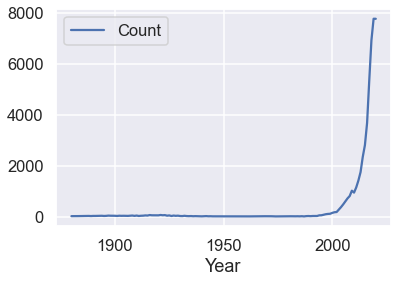

In [23]:
luna.plot('Year', 'Count');

It's just as the article says. Luna wasn't popular at all until the year 2000
or so. Think about that---if someone tells you that their name is Luna, you can
take a pretty good guess at their age even without any other information about
them!

Just for fun, here's the same plot for the name Siri.

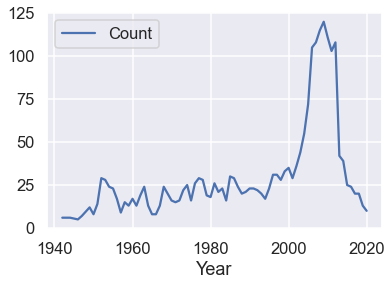

In [24]:
# Using .query is similar to using .loc with a boolean series. query() has more
# restrictions on what kinds of filtering you can do but can be convenient as a
# shorthand. 
(baby.query('Name == "Siri"')
 .query('Sex == "F"')
 .plot('Year', 'Count')
);

Why might the popularity have dropped so suddenly? Well, Siri happens to be the
name of the voice assistant for Apple products and was introduced in 2011.
Let's draw a line for the year 2011 and take a look...

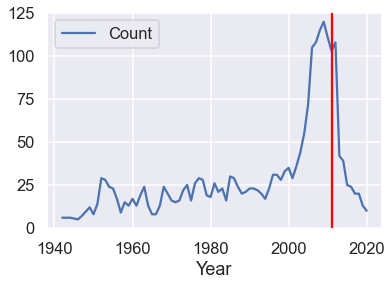

In [25]:
(baby.query('Name == "Siri"')
 .query('Sex == "F"')
 .plot('Year', 'Count')
)
plt.axvline(2011, c='red');

## Exercises


- Duplicate the plot of Luna popularity over time but using your own first
  name. If you used that plot to make a guess at your age, what would you
  guess?


- In this section we talked about how to use `.loc` and `.iloc` for slicing.
  We've also shown a few shorthands. For each of these shorthand code snippets,
  convert them to the equivalent code that uses `.loc` or `.iloc`.

  ```python
  baby['Name']
  ```

  ```python
  baby[0:5]
  ```

  ```python
  baby[['Name', 'Count']]
  ```

  ```python
  baby[baby['Count'] < 10]
  ```

- What's the difference between running:
  
  ```python
  baby['Name']
  ```
  
  and:

  ```python
  baby[['Name']]
  ```

  And, why does this code work:

  ```python
  baby[['Name']].iloc[0:5, 0]
  ```
  
  but this code errors?

  ```python
  baby['Name'].iloc[0:5, 0]
  ```

- The first code snippet makes a dataframe with 6 rows, but the second makes a
  dataframe with 5 rows. Why?
  
  ```python
  baby.loc[0:5]
  ```

  ```python
  baby.iloc[0:5]
  ```